
# Project: Investigate Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

First of all I will describe the Dataset that I had been chosen. It is "Movies" dataset. The reason of choose this dataset because of that:
1-It is more clear. 
2-Easy to understand.
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


At the end of this section, we have many question to ask after investigate movies dataset So, some of question:
### 1-What is the kind of movies that get more revenue?
### 2-Who is the cast of these movies that get more popularity?
### 3-What is the kind of movies that get more vote?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()




,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#   types and look for instances of missing or possibly errant data.
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#check the if there is a null value in movies dataset
df_movies.isnull().values.any()

True

In [6]:
#Just to check if there are a 0's in revenue column but I will not do any thing on it because it will not affect my investegation while the value of it is 0
#And also this for budget column
df_movies[df_movies['revenue']==0].revenue.count()

6016

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
#Check if there is a duplicated rows
df_movies[df_movies['id'].duplicated()].id.count()

1

In [8]:
df_movies[df_movies['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#we will remove duplicated row 
df_movies=df_movies.drop_duplicates(["id"])
# to make sure if the duplicated value is removed or not 
df_movies[df_movies['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# We will use to_datetime() to convert from time stamp to dateTime so if we need to deal with these column we can 
df_movies['release_date']=pd.to_datetime(df_movies['release_date'])
#   cleaned, perform those cleaning steps in the second part of this section.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1facd710>],
      dtype=object)

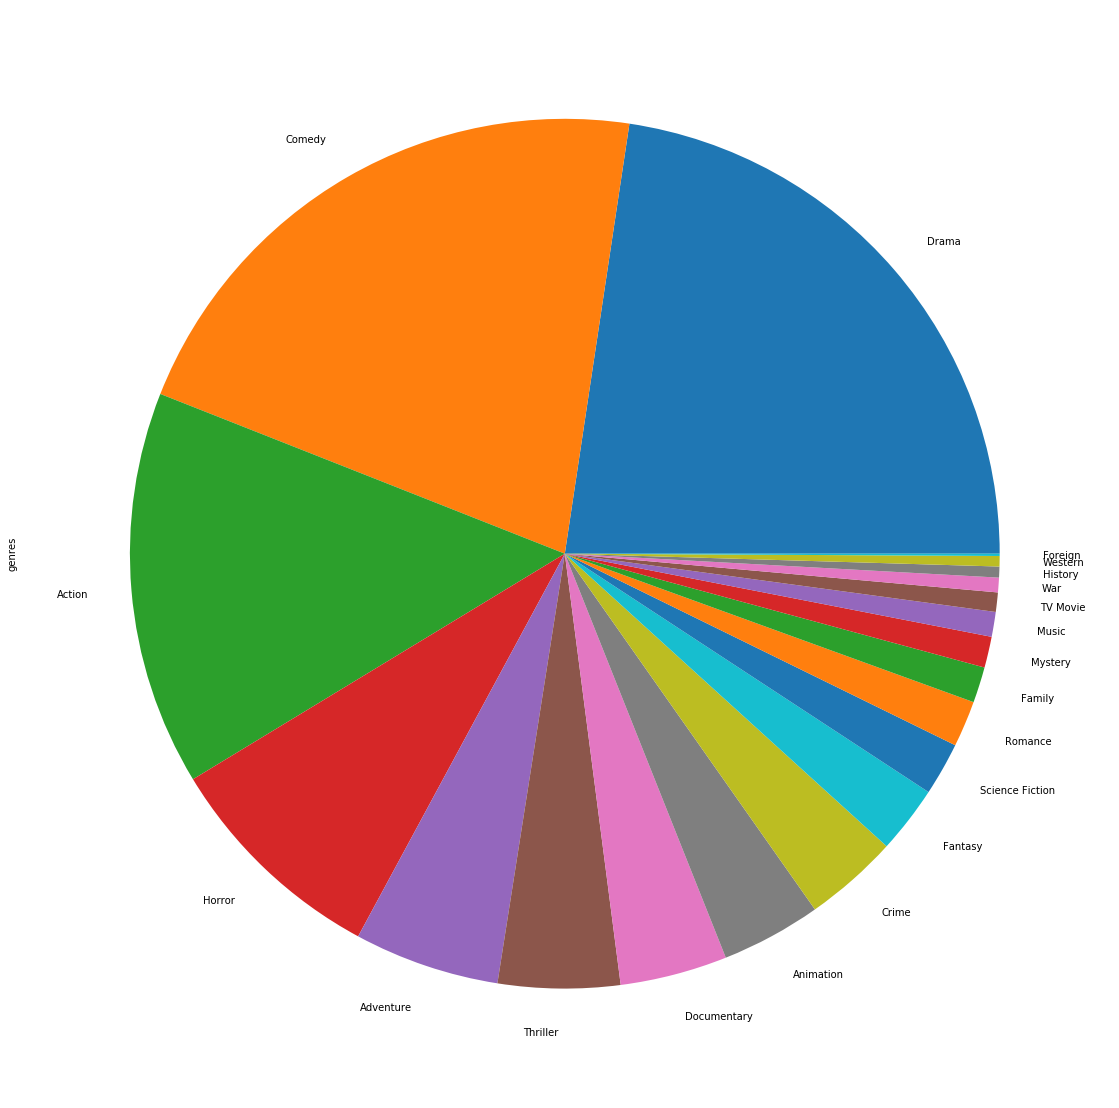

In [14]:
#Here in the genres column we have more than one type and it is saperated by "|" so here we will split them and working with these data 
df_movies['genres']=df_movies['genres'].str.split('|' ,1, expand=True)
df_movies.genres.value_counts().plot.pie(subplots=True,figsize=(20, 20))


In [114]:
#Also here in the cast column we have more than one cast and it is saperated by "|" so here we will split them and working with these data 
df_movies['cast']=df_movies['cast'].str.split('|' ,1, expand=True)
df_movies.cast.value_counts()

Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Johnny Depp              37
Sylvester Stallone       37
Tom Hanks                37
Steven Seagal            35
Jean-Claude Van Damme    35
John Travolta            33
Robin Williams           33
Denzel Washington        33
Tom Cruise               31
Arnold Schwarzenegger    30
John Cusack              30
Steve Martin             30
Harrison Ford            30
Al Pacino                29
Keanu Reeves             29
Sean Connery             29
Samuel L. Jackson        29
Woody Allen              29
Adam Sandler             29
Eddie Murphy             29
Mel Gibson               28
Kevin Costner            28
Michael Douglas          26
Ben Stiller              26
Jack Nicholson           25
Jeff Bridges             25
                         ..
Goran Visnjic             1
Kim Stanley               1
Arye Gross                1
Mircea Monroe             1
Michael Rapaport    

In [115]:
#Convert the popularity type
df_movies['popularity']= df_movies['popularity'].astype(float)


<a id='eda'></a>
## Exploratory Data Analysis

In this section we will Describe each question and why we will 

## First Question:
1-What is the kind of movies that get more revenue?

As we can see in the next cell there is a relation between the kind of movies and the revenue So, we can also say that more people prefer these kind of movies that get more revenue.

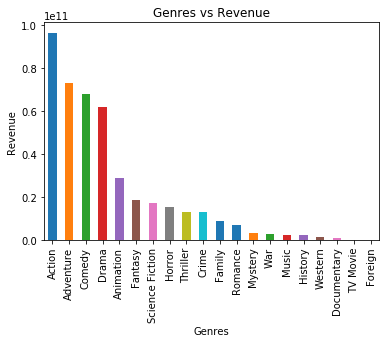

In [116]:
df_movies.groupby('genres').revenue.sum().sort_values(ascending = False).plot.bar()
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Genres vs Revenue')
plt.show()

## Second Question:
2-What is the kind of movies that get more vote?

As we can see in the polot there is a relation between the kind of movies and the vote of them is that the same as the relation with revenue more people prefer these kind of movies.


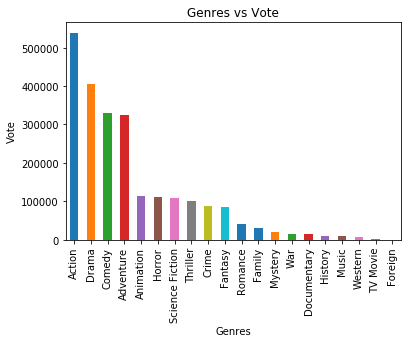

In [117]:
df_movies.groupby('genres').vote_count.sum().sort_values(ascending = False).plot.bar()
plt.ylabel('Vote')
plt.xlabel('Genres')
plt.title('Genres vs Vote')
plt.show()

## Third Question:
3-Who is the cast of these movies that get more popularity?

Also, as we can see in plot below that there is a relation between the popularity of movies and the cast.So, if there is a cast in the movie that he/she known and has a lot of fans the movie will get more popularity.

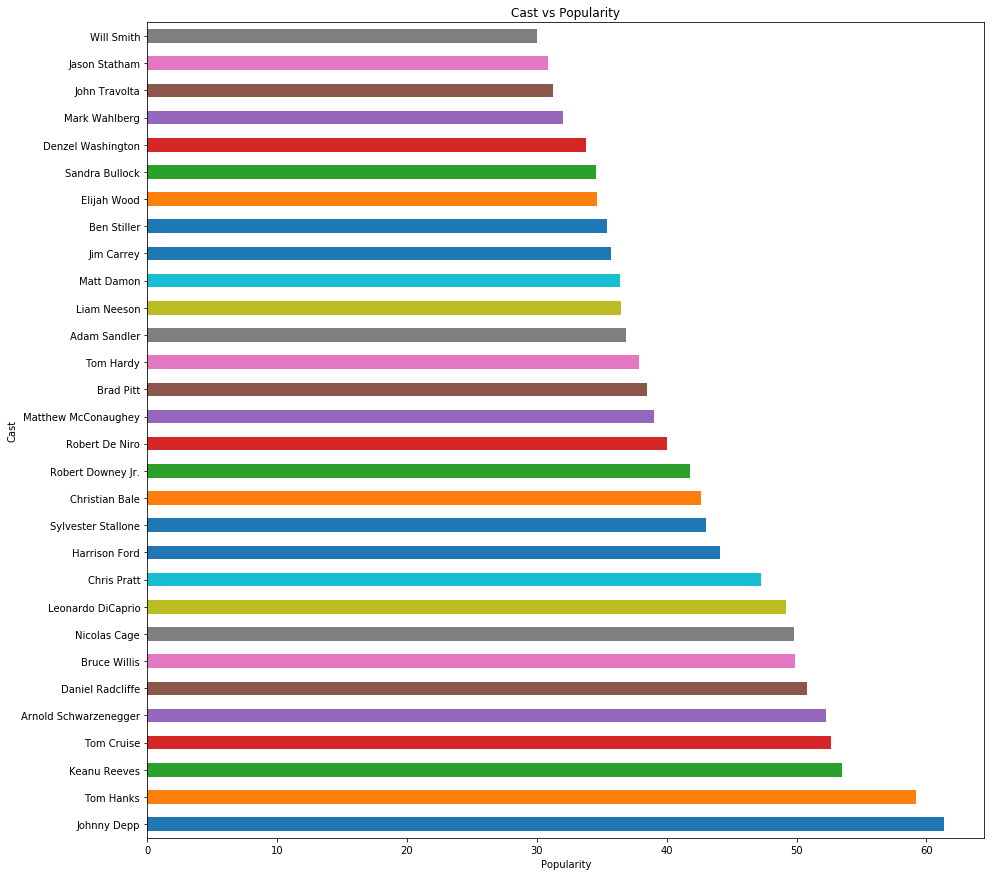

In [118]:
df_movies.groupby('cast').popularity.sum().sort_values(ascending = False).head(30).plot.barh(stacked=True,figsize=(15, 15))
plt.ylabel('Cast')
plt.xlabel('Popularity')
plt.title('Cast vs Popularity')
plt.show()


<a id='conclusions'></a>
## Conclusions

### Answering the question!

After visualziton all columns in the data set we can say that there is a relation between these 3 questions is that
If tha cast is will-known the movie will take more Views So, also based on that this movie will get more revenue.

e.g.Johnny Depp is a will-known cast and has alot of fans so, the movies that which he represents it will take more
popularity and based on that it will get more revenue.

### limitiations

We think the available data is not engouh, there're some data that will increase the accuracy of the analysis if it avaliable for example in my opinion if there is a column that has the author of each movei We can use it to identify each type of movie, who is the best author and whether movies genre success depends on  the writer's creativity or on other things.Another limition is having a columns that not necessary in my opinion the same as (tagline column)  , duplicated rows and having data type needed to be convert it.